<a href="https://colab.research.google.com/github/th2ry95/Data-Science-Portfolio/blob/main/01_Analyse_Ventes_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Configuration de la simulation
n_rows = 10000
products = {
    'iPhone': 700,
    'Google Phone': 600,
    'MacBook Pro Laptop': 1700,
    'USB-C Charging Cable': 11.95,
    'Wired Headphones': 11.99,
    '27in 4K Gaming Monitor': 389.99
}
cities = ['Paris', 'Lyon', 'Marseille', 'Lille', 'Bordeaux', 'Nantes']

# Génération des données
data = {
    'Order ID': np.arange(1000, 1000 + n_rows),
    'Product': [random.choice(list(products.keys())) for _ in range(n_rows)],
    'Quantity Ordered': [random.randint(1, 3) for _ in range(n_rows)],
    'Order Date': [(datetime(2025, 1, 1) + timedelta(days=random.randint(0, 364),
                   hours=random.randint(0, 23), minutes=random.randint(0, 59))).strftime('%m/%d/%y %H:%M')
                   for _ in range(n_rows)],
    'Purchase Address': [f"{random.randint(1, 999)} Rue de la Data, {random.choice(cities)}" for _ in range(n_rows)]
}

df_simulated = pd.DataFrame(data)
# Ajout du prix unitaire basé sur le dictionnaire
df_simulated['Price Each'] = df_simulated['Product'].map(products)

# Sauvegarde en CSV
df_simulated.to_csv('ventes_data.csv', index=False)
print("Fichier 'ventes_data.csv' généré avec succès !")

Fichier 'ventes_data.csv' généré avec succès !


In [32]:
# 1. Charger les données
df = pd.read_csv('ventes_data.csv')

#Afficher la base de donnée
df.head()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,1000,USB-C Charging Cable,2,08/17/25 19:46,"876 Rue de la Data, Lille",11.95
1,1001,Google Phone,1,03/20/25 03:51,"454 Rue de la Data, Lille",600.00
2,1002,USB-C Charging Cable,2,10/18/25 14:04,"540 Rue de la Data, Bordeaux",11.95
3,1003,iPhone,3,05/21/25 12:25,"90 Rue de la Data, Bordeaux",700.00
4,1004,iPhone,1,07/11/25 16:38,"743 Rue de la Data, Bordeaux",700.00


In [33]:
#Afficher les informations concernants notres base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          10000 non-null  int64  
 1   Product           10000 non-null  object 
 2   Quantity Ordered  10000 non-null  int64  
 3   Order Date        10000 non-null  object 
 4   Purchase Address  10000 non-null  object 
 5   Price Each        10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [34]:
# Observation des lignes vides
df.isnull()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [35]:
#Creation de la nouvelle colonne Mounth

df['Mounth'] = df['Order Date'].str[0:2]
df['Mounth'] = df['Mounth'].astype('int32')

In [36]:
#Creation de la nouvelle colonne Sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [37]:
# Tableau croisée entre Mois et ventes
resultats_mois = df.groupby('Mounth')['Sales'].sum()
resultats_mois

,Sales
Mounth,
1,987979.21
2,945767.96
3,1008339.25
4,869918.39
5,1119808.43
6,909923.38
7,962684.08
8,972620.13
9,879256.53


In [38]:
#Je classe le nombre de ventes effectuer durants les différents mois de façon décroissante
resultats_mois.sort_values(ascending=False)

,Sales
Mounth,
5,1119808.43
3,1008339.25
1,987979.21
12,985703.52
8,972620.13
7,962684.08
2,945767.96
10,945395.13
6,909923.38


In [39]:
# 1. On crée une colonne City en découpant simplement l'adresse
df['City'] = df['Purchase Address'].str.split(',').str[1]

# 2. On regroupe par ville et on affiche le total des ventes trié
df.groupby('City')['Sales'].sum().sort_values(ascending=False)

,Sales
City,
Paris,1967537.74
Marseille,1912361.88
Lille,1908316.19
Bordeaux,1898765.47
Nantes,1892442.04
Lyon,1778807.27


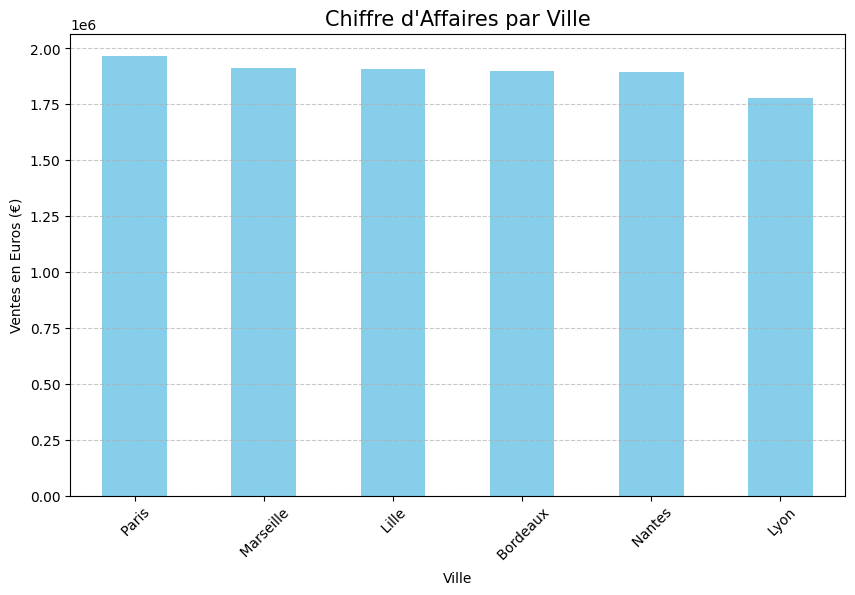

In [40]:
import matplotlib.pyplot as plt

# 1. Préparer les données (on reprend notre calcul précédent)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# 2. Créer le graphique
plt.figure(figsize=(10, 6)) # Définit la taille de l'image
city_sales.plot(kind='bar', color='skyblue')

# 3. Ajouter les titres et labels (La règle du métier : Toujours nommer ses axes !)
plt.title('Chiffre d\'Affaires par Ville', fontsize=15)
plt.xlabel('Ville')
plt.ylabel('Ventes en Euros (€)')
plt.xticks(rotation=45) # Incliner les noms des villes pour qu'ils soient lisibles
plt.grid(axis='y', linestyle='--', alpha=0.7) # Ajouter une petite grille de fond

# 4. Afficher
plt.show()

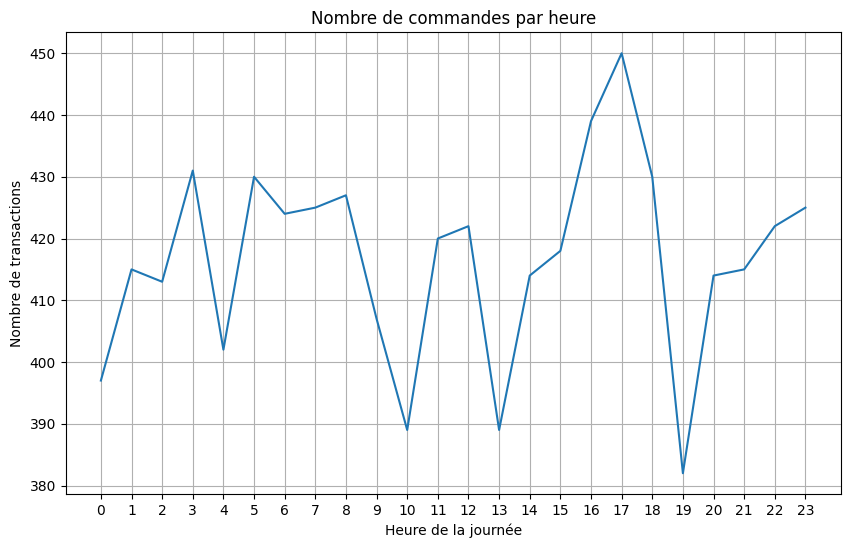

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

#Convertir la colonne date en format "Datetime" (pour que Python comprenne les heures)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# 2. Extraire l'heure dans une nouvelle colonne
df['Hour'] = df['Order Date'].dt.hour

# 3. Compter le nombre de commandes par heure
virees_horaires = df.groupby('Hour').count()['Order ID']

# 4. Visualiser pour trouver l'horaire idéale
plt.figure(figsize=(10,6))
virees_horaires.plot(grid=True)
plt.xticks(range(0,24))
plt.title('Nombre de commandes par heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de transactions')
plt.show()